# Lesson 2 - Data Views, Data transforms and Datablocks.

In [1]:
!pip install -Uqq pandas_profiling kaggle seaborn 
#!pip install -Uqq fastbook 

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

thinc 8.0.3 requires pydantic<1.8.0,>=1.7.1, but you'll have pydantic 1.8.2 which is incompatible.
spacy 3.0.6 requires pydantic<1.8.0,>=1.7.1, but you'll have pydantic 1.8.2 which is incompatible.


In [5]:
from fastbook import *
from fastai.vision.widgets import *
from kaggle import api
import seaborn as sns
import pandas_profiling
# import numpy as np - done inside fast ai code. 
# import torch
print(torch.__version__)

1.8.1


In [6]:
PRIVATEKEY = "redacted" # Azure key
key = os.environ.get('AZURE_SEARCH_KEY', PRIVATEKEY)
bear_types = 'grizzly','black','teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

2021-06-09 11:06:18,901 WARNING Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='assets.nydailynews.com', port=80): Read timed out. (read timeout=4)")': /polopoly_fs/1.3269663.1498159924!/img/httpImage/image.jpg_gen/derivatives/article_750/654079900.jpg
2021-06-09 11:06:22,909 WARNING Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='assets.nydailynews.com', port=80): Read timed out. (read timeout=4)")': /polopoly_fs/1.3269663.1498159924!/img/httpImage/image.jpg_gen/derivatives/article_750/654079900.jpg
2021-06-09 11:06:26,916 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPConnectionPool(host='assets.nydailynews.com', port=80): Read timed out. (read timeout=4)")': /polopoly_fs/1.3269663.1498159924!/i

# Introduction to EDA. 

## A patient heart dataset

In [5]:
#!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [9]:
import zipfile
path = Path("/home/ubuntu/data/heart_attack")
zip_path = path / "heart-attack-analysis-prediction-dataset.zip"
heart_path = path / "heart.csv"
if not heart_path.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(path)

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [10]:
df = pd.read_csv(heart_path)
print(len(df))
df.head()

303


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.profile_report()

In [13]:
print(len(df))
df.drop_duplicates(inplace = True)
print(len(df))

303
302


[Text(0.5, 1.0, 'Resting Blood Pressure')]

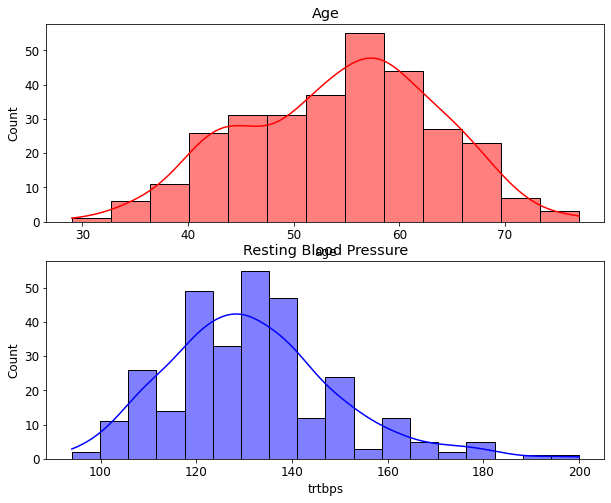

In [14]:
fig, ax = plt.subplots(2,figsize=(10,8))
sns.histplot(x=df["age"], ax=ax[0], color="red", kde=True).set(title='Age')
sns.histplot(x=df["trtbps"], ax=ax[1], color="blue", kde=True).set(title='Resting Blood Pressure')

In [15]:
sns??

[Text(0.5, 1.0, 'Higher Risk Of Heart Attack vs Heart Rate')]

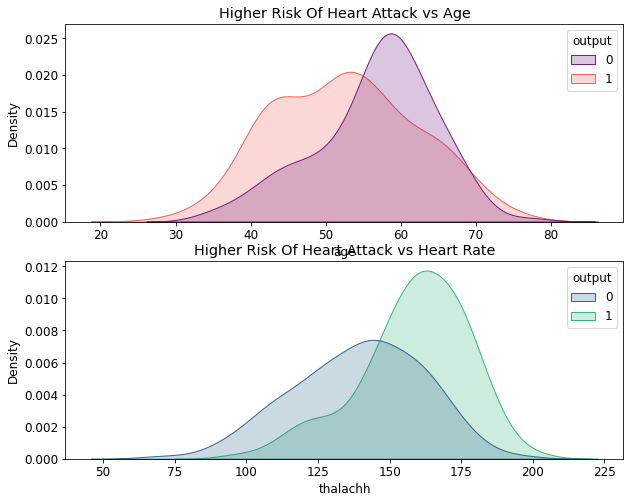

In [16]:
fig, ax = plt.subplots(2, figsize=(10,8))
sns.kdeplot(x="age", data=df, hue="output", ax=ax[0], fill="True", palette="magma").set(title="Higher Risk Of Heart Attack vs Age")
sns.kdeplot(x="thalachh", data=df, hue="output", ax=ax[1], fill="True", palette="viridis").set(title="Higher Risk Of Heart Attack vs Heart Rate")

In [17]:
sns.kdeplot??

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:>

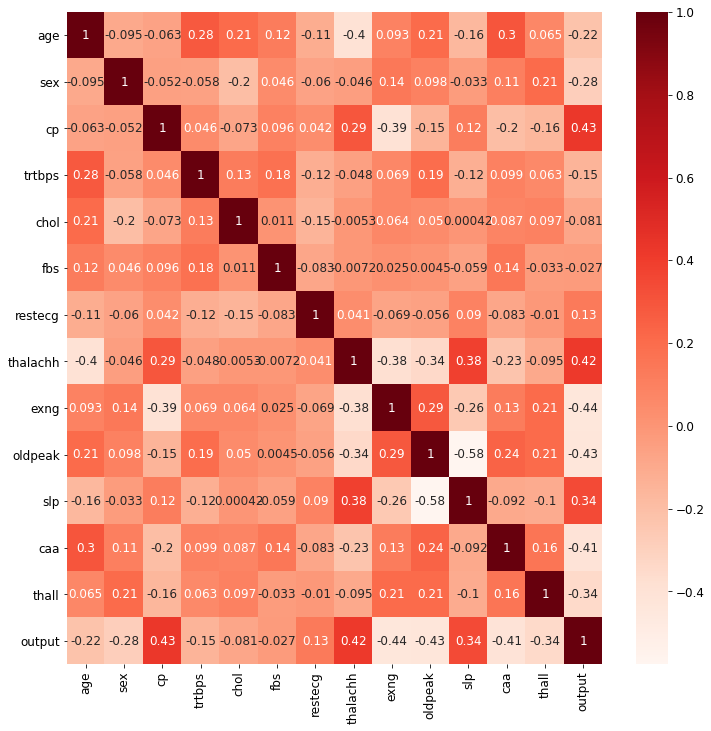

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap="Reds") 

We will look more at data exploration and analysis in the week on tabular data. 

# Introduction to data handling with Numpy, Pytorch & FastAI
There is many ways of doing the same thing - but try to avoid too much custom code.

Libraries offer optimised transforms with flexible data structures - this is typically much better than trying to create a custom class from the ground up. 

Managing data type, shape, and transformation efficiency become important, when there are lots of transformations occuring (the complexity is managed by classes and functions).

In [20]:
data = [1,4,3,2,6,4,4,3,2,6]

def my_mean(t):
    # Type here explicitly managed - convert to float. 
    return(float(sum(t)) / len(t))

print(my_mean(data))

3.5


Different functions may make different presumptions about what types are allowed. The np.mean fuction does not mind that the data is integers, but the pytorch tensor does care. 

In [21]:
print(np.mean(data)) 
print(tensor(data).float().mean())

3.5
tensor(3.5000)


We utilise the right tool for the job - the right established classes/types to reduced our workload. Inheriting from base classes, FastAI encapsulates decorates extra functionality onto standard/basic classes - like lists and a pytorch tensor.  

FastAI has the L class - for lists of items, but can index with indices/masks, and a tensor type. 

In [22]:
data_L = L(data)
print(data_L.unique())
data_L.append(7)
print(data_L.unique())
print(data_L.sum())

[1, 4, 3, 2, 6]
[1, 4, 3, 2, 6, 7]
42


In [23]:
data_t = tensor(data)
print(data_t)
print(data_t.float().mean())
print(data_t.ndim)
print(data_t.size())
print(data_t.numel())
print(data_t.dtype)

tensor([1, 4, 3, 2, 6, 4, 4, 3, 2, 6, 7])
tensor(3.8182)
1
torch.Size([11])
11
torch.int64


## Transform Chains/Pipelines
Pytorch is great for optimised chains of transformations. We can strive to leverage other people's code, and work with higher level abstractions (classes/functions), rather than reimplementing things over in a way that might be flawed/unnecessary. 

Dealing with many stages of transform, we end up needing to manage the data shape - so that a function understands its input.   

In [24]:
input = torch.randn(2, 3)
input

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])

In [25]:
??torch.unsqueeze

In [26]:
def my_log_softmax(x):    
    # Without the 'unsqueeze' we don't have the required shape to do the subtraction. 
    output = x - x.exp().sum(-1).log().unsqueeze(-1)
    
    print(x.shape)
    print(x.exp().shape)
    print(x.exp().sum(-1).shape)
    print(x.exp().sum(-1).log().shape)    
    print(x.exp().sum(-1).log().unsqueeze(-1).shape)
    print(output.shape)    
    return output

my_log_softmax(input)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2])
torch.Size([2])
torch.Size([2, 1])
torch.Size([2, 3])


tensor([[-0.9988, -1.2067, -1.1011],
        [-0.6511, -2.0043, -1.0678]])

We can just use library functions, rather than building our own from the ground up - we only need custom code when necessary. 

In [27]:
F

<module 'torch.nn.functional' from '/home/ubuntu/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py'>

In [28]:
F.log_softmax(input) 

<ipython-input-28-627e81159379>:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  F.log_softmax(input)


tensor([[-0.9988, -1.2067, -1.1011],
        [-0.6511, -2.0043, -1.0678]])

There is a warning - due to the data shape and the assumption the function must make (without having a non-default argument), to explain how to treat the shape. How does the function know what to sum, if there are multiple dimensions? 

We must often manage shape information, to configure a transform - either by re-arranging (or more likely 're-viewing' the data), or otherwise specifying the shape explanation - such as a data dimension choice.   

In [29]:
F.log_softmax(input, dim=-1) 

tensor([[-0.9988, -1.2067, -1.1011],
        [-0.6511, -2.0043, -1.0678]])

### Fast AI pipeline/transform classes

In [30]:
Transform??

In [31]:
def f(x:int): return x+1
tfm = Transform(f)
tfm(2),tfm(2.0)

(3, 2.0)

In [32]:
class NormalizeMean(Transform):
    def setups(self, items): self.mean = sum(items)/len(items)
    def encodes(self, x): return x-self.mean
    def decodes(self, x): return x+self.mean
    
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start = 2
y = tfm(start)
z = tfm.decode(y)
tfm.mean,y,z

(3.0, -1.0, 2.0)

In [28]:
Pipeline??

In [33]:
def f1(x:int): return x+1
def f2(x:int): return float(x)/2
tfm1 = Transform(f1)
tfm2 = Transform(f2)
tfms = Pipeline([tfm1, tfm2])

tfms(7)

4.0

# Introduction to Datablocks & Data Loaders
How do we have a truly *generic* data interpreter class, that will allow us to customise the information about our data easily, to pass to the downstream functions/classes. 

We need tools that allow us to specify the important minimum information needed to interpret data in a systemic way. 

Welcome the **datablock**!

In [34]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [50]:
parent_label??

In [33]:
get_image_files??

In [34]:
get_files??

In [35]:
RandomSplitter??

In [35]:
dls = bears.dataloaders(path)

TypeError: 'NoneType' object is not iterable

/home/ubuntu/miniconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


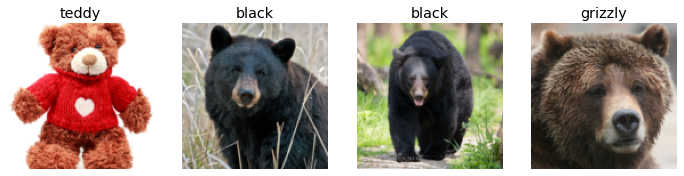

In [37]:
dls.valid.show_batch(max_n=4, nrows=1)

 # Augmentation & Item/Batch Transforms

In [38]:
Resize??

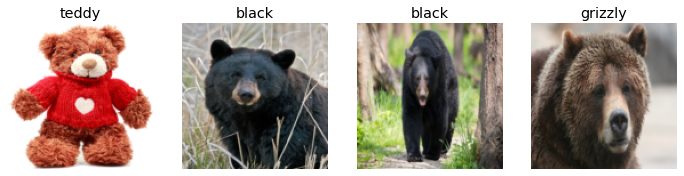

In [39]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

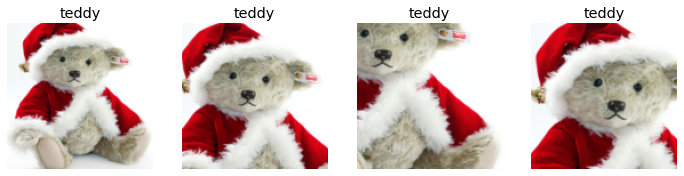

In [40]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [41]:
aug_transforms??

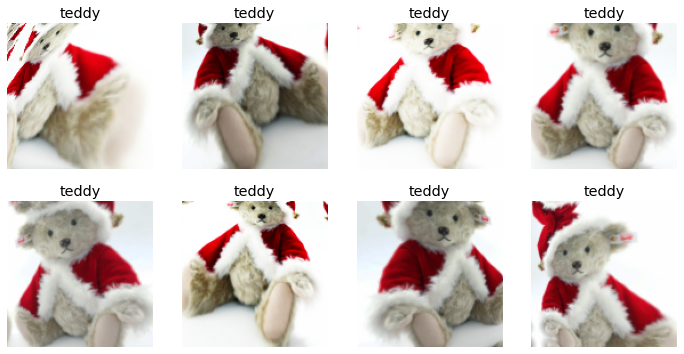

In [42]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [43]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

# Train, Review, Examine Data

In [44]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

In [49]:
# On a larger dataset, we may go more epochs of training - but first, we'd need
# to discover a better starting learning rate. 
#learn.lr_find()
#learn.fine_tune(2, 3e-3)

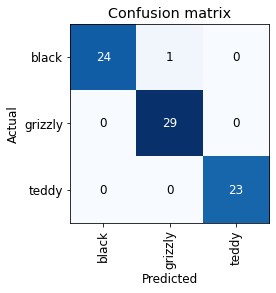

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

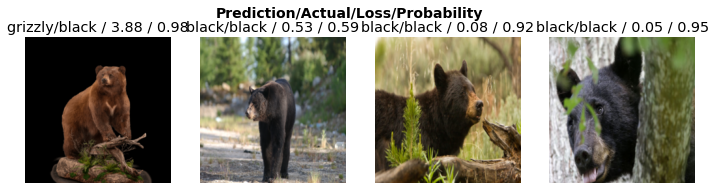

In [51]:
interp.plot_top_losses(4, nrows=1)

In [47]:
cleaner = ImageClassifierCleaner(learn)
cleaner